## PROJECT 2: Car Price Prediction

> ### TASK: Study Multiple Linear Regression
> 

### Project goals and objectives

#### Project goal

- Studying **Multiple Linear Regression**

#### Project objectives

1. Explore and prepare data 
2. Build multiple linear regression model


### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
plt.style.use('seaborn')


from collections import Counter

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### LOAD DATA

In [2]:
# Path to data
data_path = "data/CarPrice_Assignment.csv"

In [3]:
# Create dataframe
data_df = pd.read_csv(data_path)

# Check result 
data_df.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


## EXPLORATORY DATA ANALISIS

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data_df.shape

(205, 26)

### Distribution of the target variables

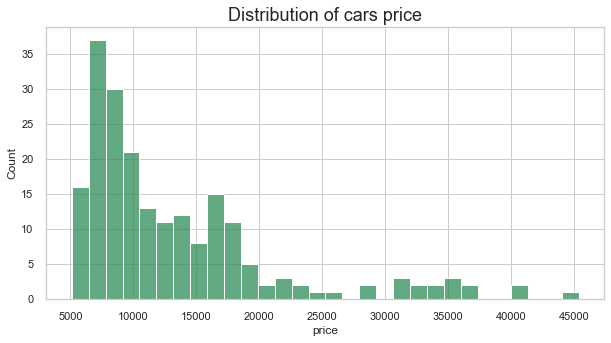

In [6]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=data_df, x="price", color="seagreen", bins=30)
plt.title("Distribution of cars price", fontsize=18);

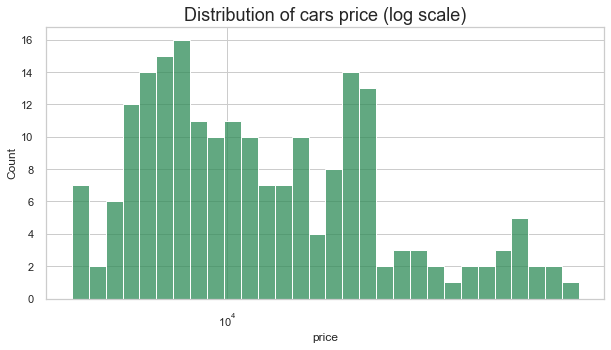

In [7]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=data_df, x="price", color="seagreen", log_scale=True, bins=30)
plt.title("Distribution of cars price (log scale)", fontsize=18);

## Variable Types

In [8]:
# Identify the categorical variables
cat_vars = [var for var in data_df.columns if data_df[var].dtype == 'O']

# Number of categorical variables
print(f' Number of categorical variables: {len(cat_vars)}')

 Number of categorical variables: 10


In [9]:
cat_vars

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [10]:
# Identify the the discrete variables
discrete_vars = [var for var in data_df.columns if len(data_df[var].unique()) < 30  and var not in cat_vars]

# Number of discrete variables
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  3


In [11]:
discrete_vars

['symboling', 'peakrpm', 'citympg']

In [12]:
# Identify the the numerical variables
num_vars = [var for var in data_df.columns if var not in cat_vars and var not in discrete_vars]

# Number of numerical variables
print(f' Number of numerical variables: {len(num_vars)}')

 Number of numerical variables: 13


In [13]:
num_vars

['car_ID',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'highwaympg',
 'price']

### Missing values

In [14]:
 # List of the variables that contain missing values
vars_with_na = [var for var in data_df.columns if data_df[var].isnull().sum() > 0]

# Percentage of missing values
data_df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

### Numerical variables

In [15]:
# Descriptive statistics
data_df[num_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


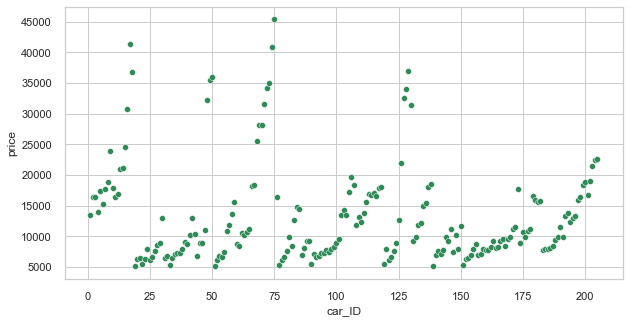

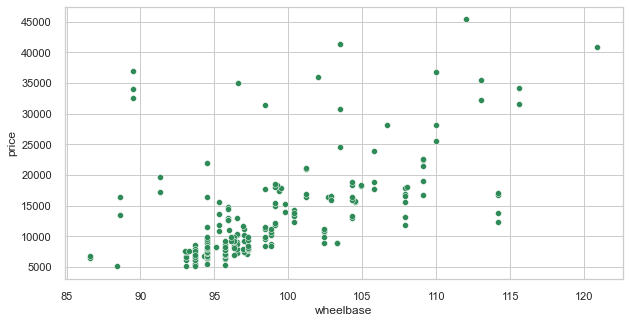

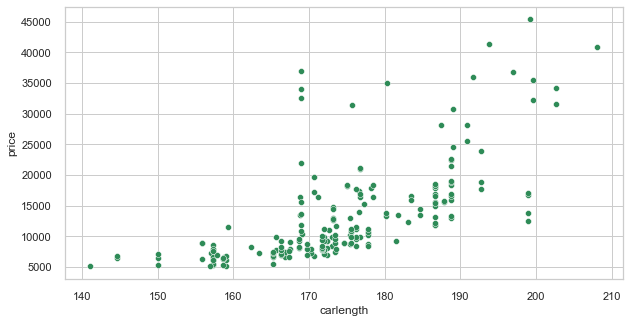

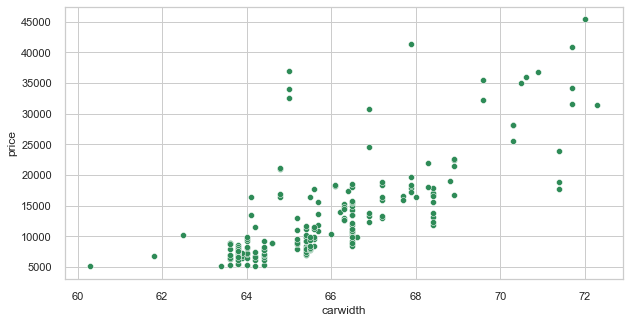

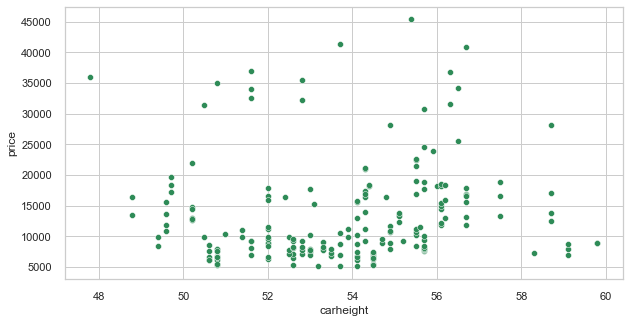

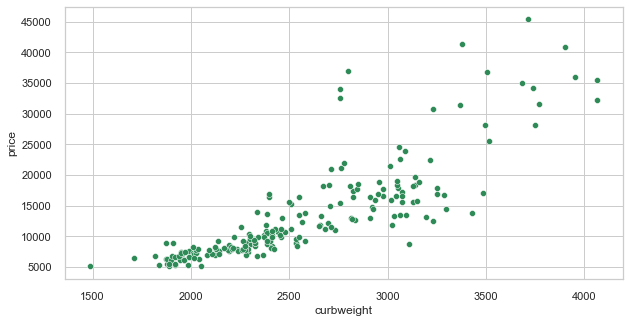

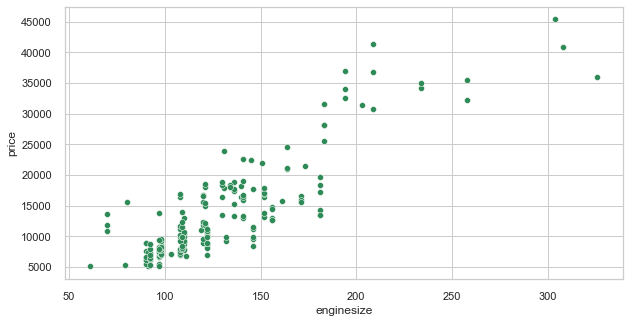

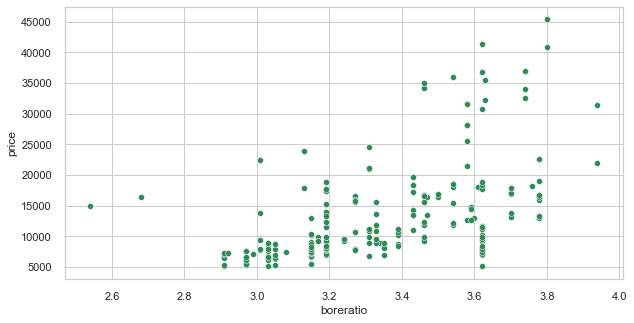

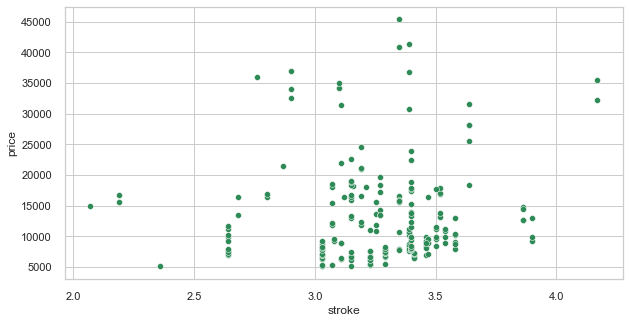

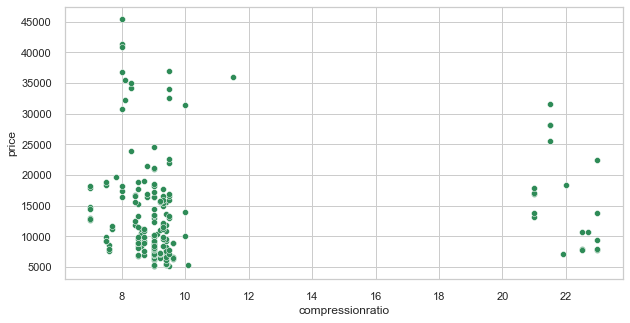

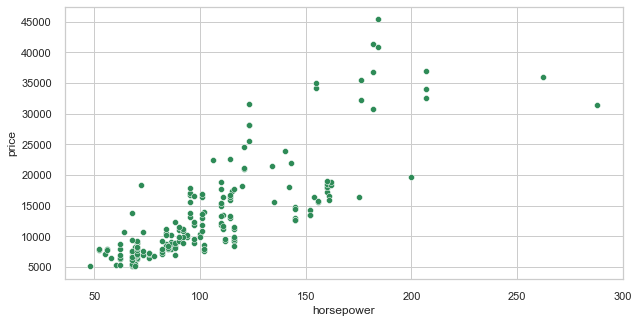

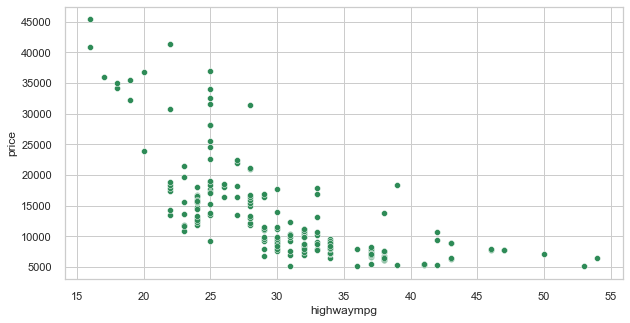

In [16]:
for var in data_df[num_vars]:
    if var !="price":
        sns.scatterplot(data=data_df, x=var, y="price", color="seagreen")
        plt.show()

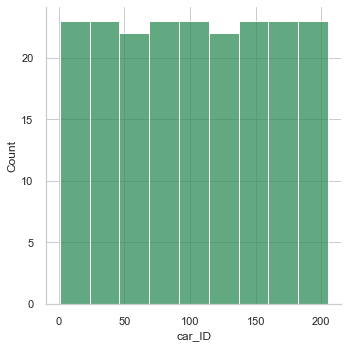

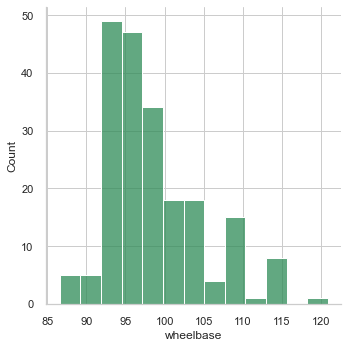

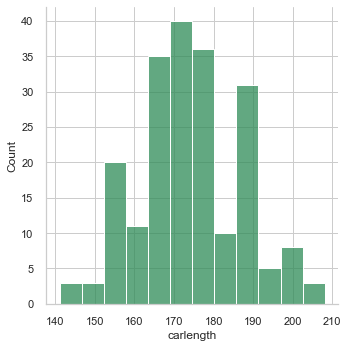

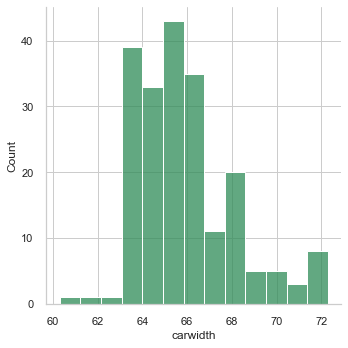

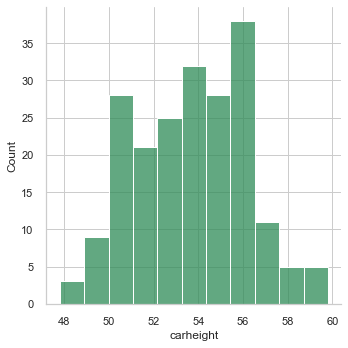

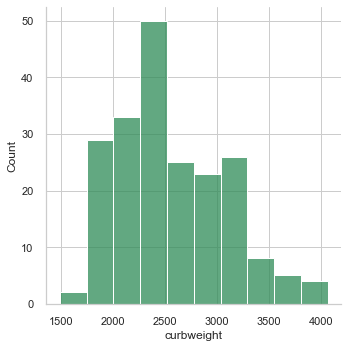

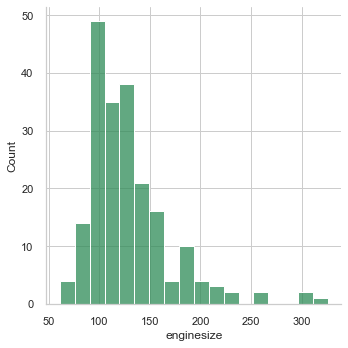

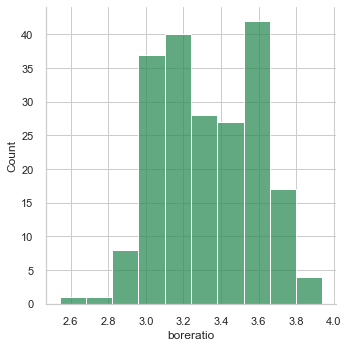

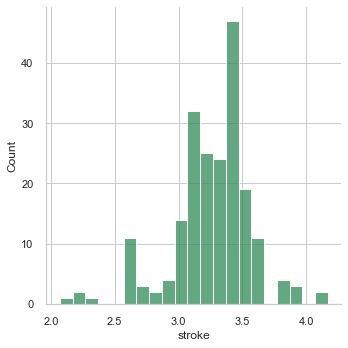

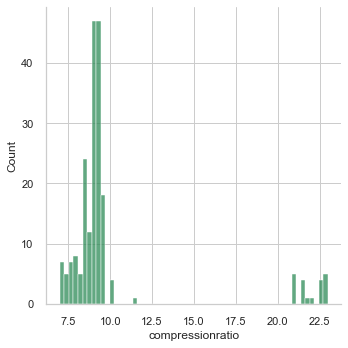

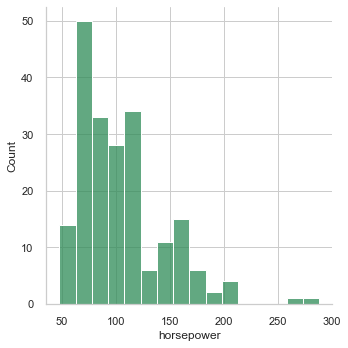

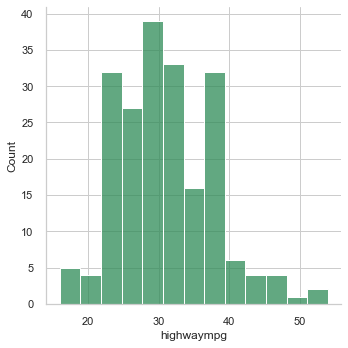

In [17]:
for var in data_df[num_vars]:
    if var !="price":
        sns.displot(data=data_df, x=var, color="seagreen")
        plt.show()

### Discrete variables


In [18]:
data_df[discrete_vars].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
symboling,3,3,1,2,2,2,1,1,1,0,2,0,0,0,1,0,0,0,2,1
peakrpm,5000,5000,5000,5500,5500,5500,5500,5500,5500,5500,5800,5800,4250,4250,4250,5400,5400,5400,5100,5400
citympg,21,21,19,24,18,19,19,19,17,16,23,23,21,21,20,16,16,15,47,38


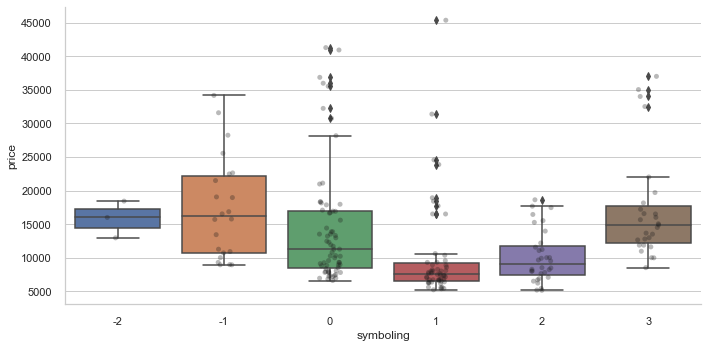

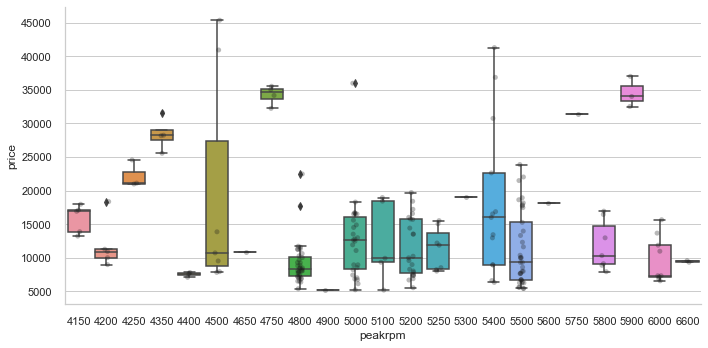

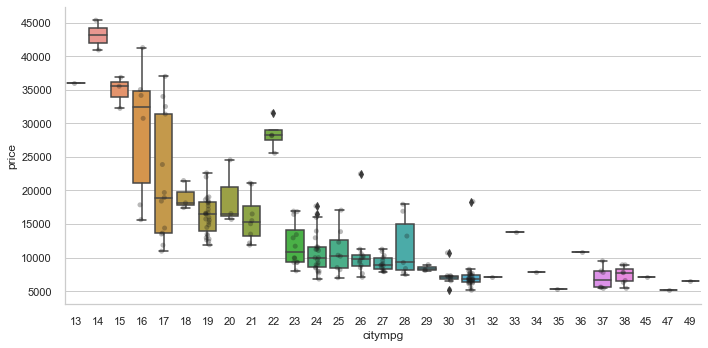

In [19]:
for var in discrete_vars:
    sns.catplot(x=var, y='price', data=data_df, kind="box", height=5, aspect=2)
    sns.stripplot(x=var, y='price', data=data_df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

### Categorical variables


In [20]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  10


In [21]:
data_df[cat_vars].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [22]:
data_df[cat_vars].describe().T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


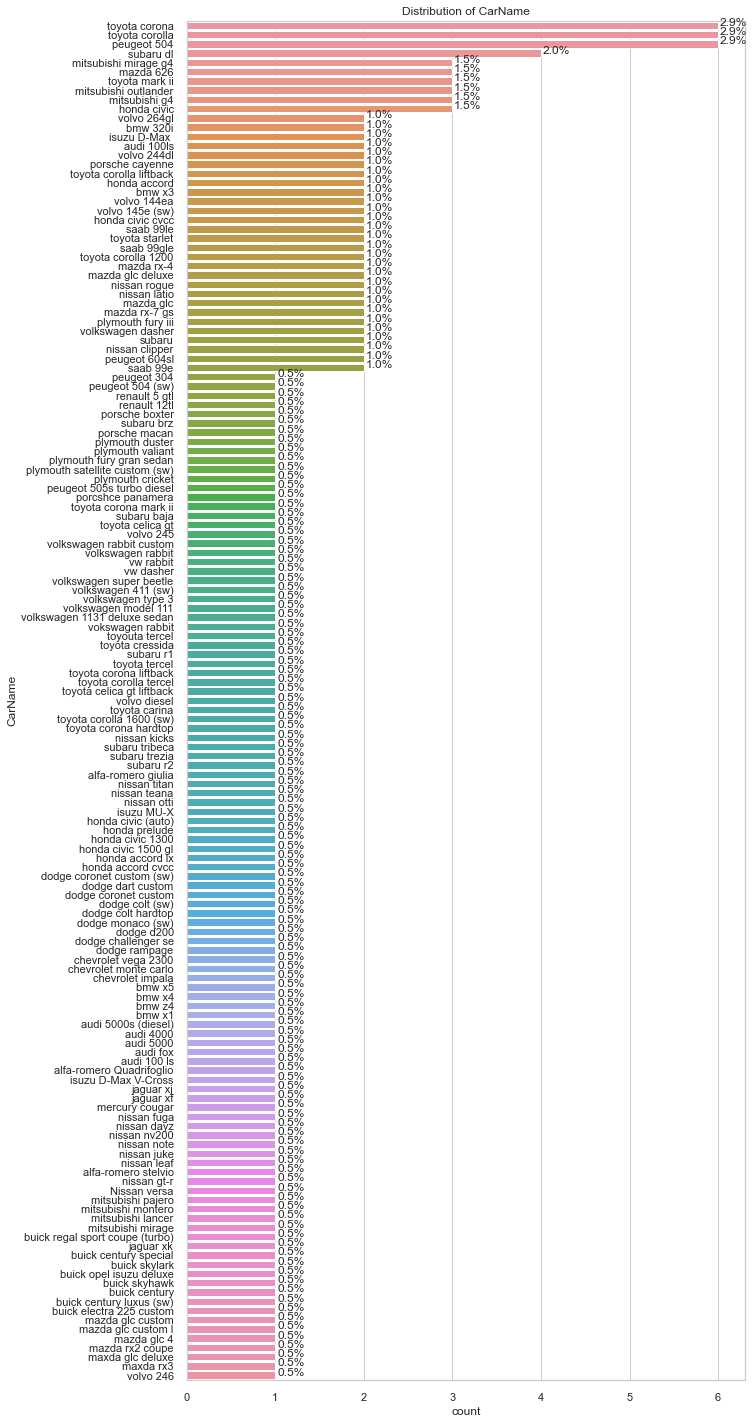

In [23]:
f, ax = plt.subplots(figsize=(10,25))
sns.countplot(y=data_df.CarName, order = data_df.CarName.value_counts().index);
ax.set_title('Distribution of CarName');
ax.set(ylabel='CarName')

total = len(data_df['CarName'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

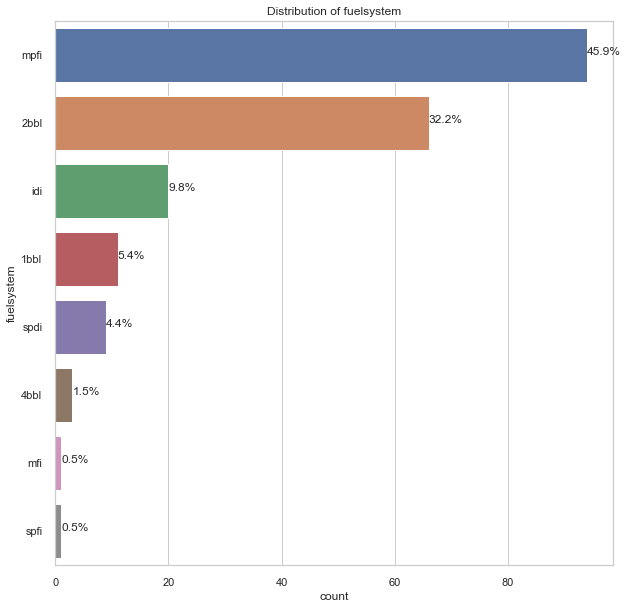

In [24]:
f, ax = plt.subplots(figsize=(10,10))
sns.countplot(y=data_df.fuelsystem, order = data_df.fuelsystem.value_counts().index);
ax.set_title('Distribution of fuelsystem');
ax.set(ylabel='fuelsystem')

total = len(data_df['fuelsystem'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

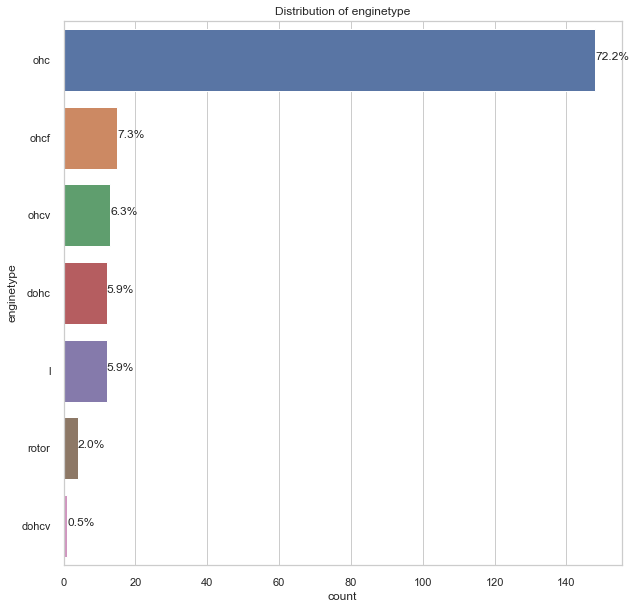

In [25]:
f, ax = plt.subplots(figsize=(10,10))
sns.countplot(y=data_df.enginetype, order = data_df.enginetype.value_counts().index);
ax.set_title('Distribution of enginetype');
ax.set(ylabel='enginetype')

total = len(data_df['enginetype'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

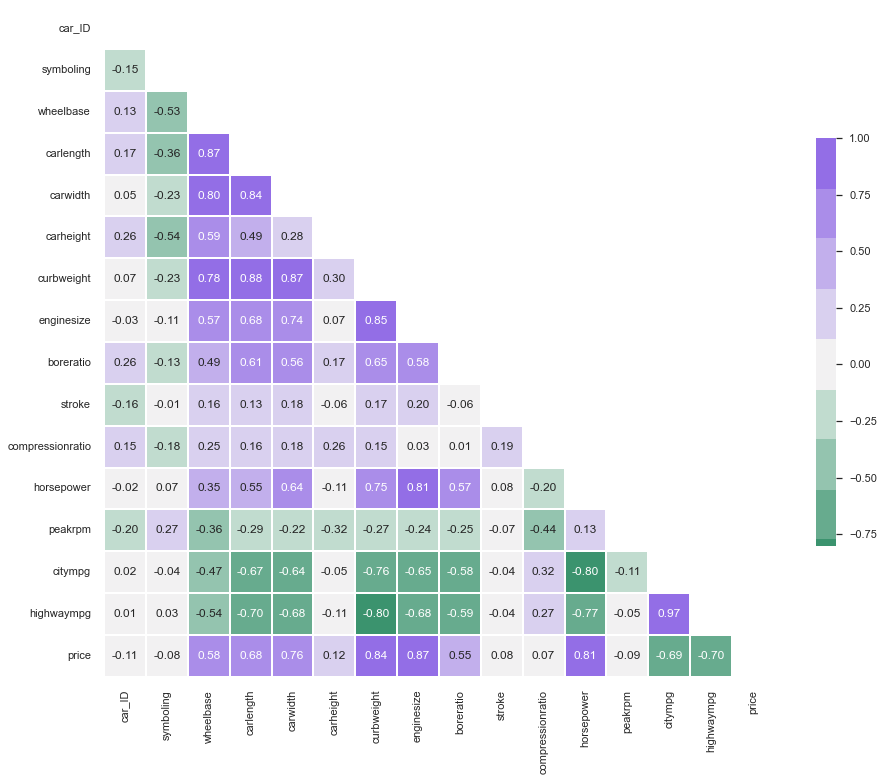

In [26]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar_kws={"shrink": .5})
plt.show()

# MULTIPLE LINEAR REGRESSION

### Data Preprocessing

In [27]:
data_df.drop(['car_ID','CarName'],axis = 1,inplace = True)
data_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
def label_encoding(cat_vars):
    label_encoder = LabelEncoder()
    data_df[cat_vars] = label_encoder.fit_transform(data_df[cat_vars])

In [29]:
label_encoding("fueltype")
label_encoding("aspiration")
label_encoding("doornumber")
label_encoding("carbody")
label_encoding("drivewheel")
label_encoding("enginelocation")
label_encoding("enginetype")
label_encoding("cylindernumber")
label_encoding("fuelsystem")
data_df.head().T

,0,1,2,3,4
symboling,3.00,3.00,1.00,2.00,2.00
fueltype,1.00,1.00,1.00,1.00,1.00
aspiration,0.00,0.00,0.00,0.00,0.00
doornumber,1.00,1.00,1.00,0.00,0.00
carbody,0.00,0.00,2.00,3.00,3.00
drivewheel,2.00,2.00,2.00,1.00,0.00
enginelocation,0.00,0.00,0.00,0.00,0.00
wheelbase,88.60,88.60,94.50,99.80,99.40
carlength,168.80,168.80,171.20,176.60,176.60
carwidth,64.10,64.10,65.50,66.20,66.40


In [30]:
# Define x,y
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

In [31]:
print(X)

[[ 3.0e+00  1.0e+00  0.0e+00 ...  5.0e+03  2.1e+01  2.7e+01]
 [ 3.0e+00  1.0e+00  0.0e+00 ...  5.0e+03  2.1e+01  2.7e+01]
 [ 1.0e+00  1.0e+00  0.0e+00 ...  5.0e+03  1.9e+01  2.6e+01]
 ...
 [-1.0e+00  1.0e+00  0.0e+00 ...  5.5e+03  1.8e+01  2.3e+01]
 [-1.0e+00  0.0e+00  1.0e+00 ...  4.8e+03  2.6e+01  2.7e+01]
 [-1.0e+00  1.0e+00  1.0e+00 ...  5.4e+03  1.9e+01  2.5e+01]]


In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [33]:
# Standard Normalization
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [34]:
# Instantiate model
regressor = LinearRegression()

# Fit the model
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
# Coefficients
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficients:  [  263.95207446  1043.35533687   248.83608676  -730.65845931
  -872.16479578   592.57121647  1462.68232745  1207.40418679
  -672.65680917  1261.84465938   228.04969367   923.78807186
   391.09673595  -362.163353    3789.15657008  -132.67989927
  -645.51578647  -673.83404742  1682.48034834   532.89498444
   868.23912225 -1592.35455397   532.86279888]
Intercept:  13223.41463414637


In [36]:
# Prediction
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[23861.29 30760.  ]
 [16692.59 17859.17]
 [10669.27  9549.  ]
 [13720.85 11850.  ]
 [23549.94 28248.  ]
 [ 7177.22  7799.  ]
 [ 9188.16  7788.  ]
 [ 8058.97  9258.  ]
 [10590.35 10198.  ]
 [ 8326.58  7775.  ]
 [16335.67 13295.  ]
 [ 8163.95  8238.  ]
 [16156.17 18280.  ]
 [10719.07  9988.  ]
 [38372.99 40960.  ]
 [ 8604.07  6488.  ]
 [-1310.47  5151.  ]
 [14151.03 12629.  ]
 [10588.25  8189.  ]
 [11394.17  9960.  ]
 [11001.27  8495.  ]
 [20860.7  13499.  ]
 [ 8710.44  8249.  ]
 [ 2613.91  6479.  ]
 [ 8251.38  6692.  ]
 [22719.25 41315.  ]
 [14374.33  9639.  ]
 [16267.36 13415.  ]
 [ 6355.64  7999.  ]
 [16787.17 12940.  ]
 [24009.93 25552.  ]
 [ 9285.11  6229.  ]
 [ 6006.74  7898.  ]
 [24340.04 21485.  ]
 [ 9116.18  7689.  ]
 [24191.47 28176.  ]
 [10500.56 11259.  ]
 [11431.86 10945.  ]
 [ 7062.56  8916.5 ]
 [14282.37 14489.  ]
 [ 8981.63  7463.  ]]


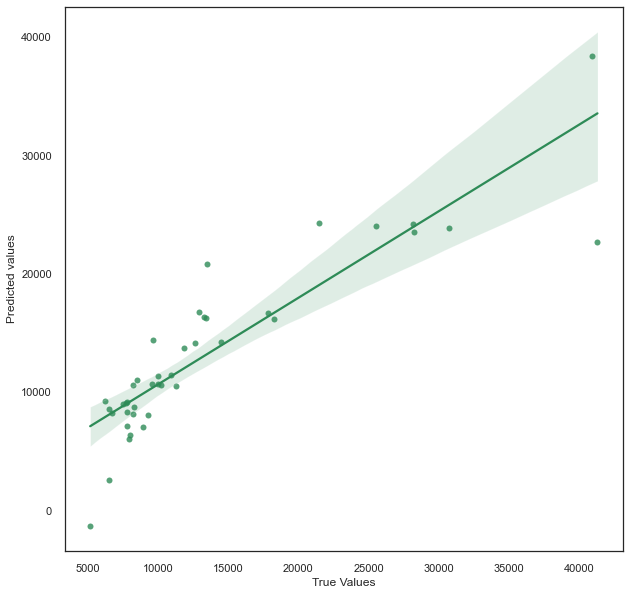

In [37]:
plt.figure(figsize=(10,10))
sns.regplot(x = y_test,y = y_pred,  color="seagreen")
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.show()